# Reading CSV Files

Comma-separated Values (CSV) are the most common text-based file format for sharing geospatial data. The structure of the file is 1 data record per line, with individual *columns* separated by a comma. 

In general, the separator character is called a delimiter. Other popular delimiters include the tab (\\t), colon (:) and semi-colon (;) characters. 

Reading CSV file properly requires us to know which delimiter is being used, along with quote character to surround the field values that contain space of the delimiter character. Since reading delimited text file is a very common operation, and can be tricky to handle all the corner cases, Python comes with its own library called `csv` for easy reading and writing of CSV files. To use it, you just have to import it.


In [1]:
import csv

The preferred way to read CSV files is using the `DictReader()` method. Which directly reads each row and creates a dictionary from it - with column names as *key* and column values as *value*. Let's see how to read a file using the `csv.DictReader()` method.

In [2]:
import os
data_pkg_path = 'data'
filename = 'worldcities.csv'
path = os.path.join(data_pkg_path, filename)

In [3]:
f = open(path, 'r')
csv_reader = csv.DictReader(f, delimiter=',', quotechar='"')
print(csv_reader)
f.close()

## Using `enumerate()` function

When iterating over an object, many times we need a counter. We saw in the previous example, how to use a variable like `count` and increase it with every iteration. There is an easy way to do this using the built-in `enumerate()` function.

In [4]:
cities = ['San Francisco', 'Los Angeles', 'New York', 'Atlanta']
for x in enumerate(cities):
    print(x)

(0, 'San Francisco')
(1, 'Los Angeles')
(2, 'New York')
(3, 'Atlanta')


We can use `enumerate()` on any iterable object and get a tuple with an `index` and the iterable `value` with each iteration. Let's use it to print the first 5 lines from the DictReader object.

In [5]:
f = open(path, 'r', encoding='utf-8')

csv_reader = csv.DictReader(f, delimiter=',', quotechar='"')

for index, row in enumerate(csv_reader):
    print(row)
    if index == 4: # recall indexing starts at 0 in Python, so we hit 4 after five iterations
        break
f.close()

{'city': 'Tokyo', 'city_ascii': 'Tokyo', 'lat': '35.6850', 'lng': '139.7514', 'country': 'Japan', 'iso2': 'JP', 'iso3': 'JPN', 'admin_name': 'Tōkyō', 'capital': 'primary', 'population': '35676000', 'id': '1392685764'}
{'city': 'New York', 'city_ascii': 'New York', 'lat': '40.6943', 'lng': '-73.9249', 'country': 'United States', 'iso2': 'US', 'iso3': 'USA', 'admin_name': 'New York', 'capital': '', 'population': '19354922.0', 'id': '1840034016'}
{'city': 'Mexico City', 'city_ascii': 'Mexico City', 'lat': '19.4424', 'lng': '-99.1310', 'country': 'Mexico', 'iso2': 'MX', 'iso3': 'MEX', 'admin_name': 'Ciudad de México', 'capital': 'primary', 'population': '19028000', 'id': '1484247881'}
{'city': 'Mumbai', 'city_ascii': 'Mumbai', 'lat': '19.0170', 'lng': '72.8570', 'country': 'India', 'iso2': 'IN', 'iso3': 'IND', 'admin_name': 'Mahārāshtra', 'capital': 'admin', 'population': '18978000', 'id': '1356226629'}
{'city': 'São Paulo', 'city_ascii': 'Sao Paulo', 'lat': '-23.5587', 'lng': '-46.6250', 

## Using `with` statement


The code for file handling requires we open a file, do something with the file object and then close the file. That is tedious and it is possible that you may forget to call `close()` on the file. If the code for processing encounters an error the file is not closed property, it may result in bugs - especially when writing files.

The preferred way to work with file objects is using the `with` statement. It results in simpler and cleaner code - which also ensures file objects are closed properly in case of errors.

As you see below, we open the file and use the file object `f` in a `with` statement. Python takes care of closing the file when the execution of code within the statement is complete.

In [6]:
with open(path, 'r', encoding='utf-8') as f:
    csv_reader = csv.DictReader(f)

## Filtering rows

We can use conditional statement while iterating over the rows, to select and process rows that meet certain criterial. Let's count how many cities from a particular country are present in the file.

Replace the `home_country` variable with your home country below.

In [7]:
home_country = 'India'
num_cities = 0

with open(path, 'r', encoding='utf-8') as f:
    csv_reader = csv.DictReader(f)

    for row in csv_reader:
        if row['country'] == home_country: # if India appears in country column
            num_cities += 1 # add to count
            
print(num_cities)

212


## Calculating distance

Let's apply the skills we have learnt so far to solve a complete problem. We want to read the `worldcities.csv` file, find all cities within a home country, calculate the distance to each cities from a home city and write the results to a new CSV file.

First we find the coordinates of the out selected `home_city` from the file. Replace the `home_city` below with your hometown or a large city within your country. Note that we are using the `city_ascii` field for city name comparison, so make sure the `home_city` variable contains the ASCII version of the city name (i.e not containing any accents).

In [8]:
home_city = 'Krakow'

home_city_coordinates = ()

with open(path, 'r', encoding='utf-8') as f:
    
    csv_reader = csv.DictReader(f)
    
    for row in csv_reader:
        if row['city_ascii'] == home_city:
            lat = row['lat']
            lng = row['lng']
            home_city_coordinates = (lat, lng)
            break
        
print(home_city_coordinates)

('50.0600', '19.9600')


Now we can loop through the file, find a city in the chosen home country and call the `geopy.distance.geodesic()` function to calculate the distance. In the code below, we are just computing first 5 matches.

In [15]:
from geopy import distance

counter = 0

with open(path, 'r', encoding='utf-8') as f:
    
    csv_reader = csv.DictReader(f)
    
    for row in csv_reader:
        destination = row['city_ascii']
        if (row['country'] == home_country and
            row['city_ascii'] != home_city):
            
            city_coordinates = (row['lat'], row['lng'])
            city_distance = distance.geodesic(
                city_coordinates, home_city_coordinates).km
            print(f'The distance between {home_city} and {destination} is {city_distance} kilometres.')
            counter += 1
            
        if counter == 5:
            break            

The distance between Krakow and Mumbai is 5782.985972790845 kilometres.
The distance between Krakow and Delhi is 5318.041599769162 kilometres.
The distance between Krakow and Kolkata is 6591.5373880596135 kilometres.
The distance between Krakow and Chennai is 6796.120397298579 kilometres.
The distance between Krakow and Bengaluru is 6619.113057209586 kilometres.


## Writing files

Instead of printing the results, let's write the results to a new file. Similar to `csv.DictReader()`, there is a companion `csv.DictWriter()` method to write files. We create a `csv_writer` object and then write rows to it using the `writerow()` method.

First we create an `output` folder to save the results. We can first check if the folder exists and if it doesn't exist, we can create it.

In [16]:
output_dir = 'output'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

In [ ]:
output_filename = 'cities_distance.csv'
output_path = os.path.join(output_dir, output_filename)

with open(output_path, mode='w', newline='', encoding='utf-8') as output_file:
    fieldnames = ['city', 'distance_from_home']
    csv_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
    csv_writer.writeheader()
    
    # Now we read the input file, calculate distance and
    # write a row to the output 
    with open(path, 'r', encoding='utf-8') as f:
        
        csv_reader = csv.DictReader(f)
        
        for row in csv_reader:
            if (row['country'] == home_country and
                row['city_ascii'] != home_city):
                city_coordinates = (row['lat'], row['lng'])
                city_distance = distance.geodesic(
                    city_coordinates, home_city_coordinates).km
                
                csv_writer.writerow(
                    {'city': row['city_ascii'],
                     'distance_from_home': city_distance}
                )

In [17]:
output_filename = 'cities_distance.csv'
output_path = os.path.join(output_dir, output_filename)

with open(output_path, mode='w', newline='', encoding='utf-8') as output_file:
    fieldnames = ['city', 'distance_from_home']
    csv_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
    csv_writer.writeheader()
    
    # Now we read the input file, calculate distance and
    # write a row to the output 
    with open(path, 'r', encoding='utf-8') as f:
        
        csv_reader = csv.DictReader(f)
        
        for row in csv_reader:
            destination = row['city_ascii']
            if (row['country'] == home_country and
                row['city_ascii'] != home_city):
                city_coordinates = (row['lat'], row['lng'])
                city_distance = distance.geodesic(
                    city_coordinates, home_city_coordinates).km
                
                csv_writer.writerow(
                    {'city': destination,
                     'distance_from_home': city_distance}
                )

Below is the complete code for our task of reading a file, filtering it, calculating distance and writing the results to a file.

In [21]:
import csv
import os
from geopy import distance

# configuring input and output filenames and paths
data_pkg_path = 'data'
input_filename = 'worldcities.csv'
input_path = os.path.join(data_pkg_path, input_filename)
output_filename = 'cities_distance.csv'
output_dir = 'output'
output_path = os.path.join(output_dir, output_filename)

# create an output directory if there isn't one
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    
home_city = 'Bengaluru'
home_country = 'India'

with open(input_path, 'r', encoding='utf-8') as input_file:
    
    csv_reader = csv.DictReader(input_file)
    
    # extract co_ordinates of home_city
    for row in csv_reader:
        if row['city_ascii'] == home_city:
            home_city_coordinates = (row['lat'], row['lng'])
            break

with open(output_path, mode='w', newline='') as output_file:
    
    # define column names to be written to new csv file
    fieldnames = ['city', 'distance_from_home_km']
    csv_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    with open(input_path, 'r', encoding='utf-8') as input_file:
        
        csv_reader = csv.DictReader(input_file)
        
        for row in csv_reader:
            destination = row['city_ascii']
            if (row['country'] == home_country and
                row['city_ascii'] != home_city):
                city_coordinates = (row['lat'], row['lng'])
                city_distance = distance.geodesic(
                    city_coordinates, home_city_coordinates).km
                csv_writer.writerow(
                    {'city': destination,
                     'distance_from_home_km': city_distance}
                )

print('Successfully written output file at {}'.format(output_path))

Successfully written output file at output/cities_distance.csv


## Exercise

Replace the `home_city` and `home_country` variables with your own home city and home country and create a CSV file containing distance from your home city to every other city in your country.

## My Solution

In [22]:
import csv
import os
from geopy import distance

# configuring input and output filenames and paths
data_pkg_path = 'data'
input_filename = 'worldcities.csv'
input_path = os.path.join(data_pkg_path, input_filename)
output_filename = 'cities_distance.csv'
output_dir = 'output'
output_path = os.path.join(output_dir, output_filename)

# create an output directory if there isn't one
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    
home_city = 'Krakow'
home_country = 'Poland'

with open(input_path, 'r', encoding='utf-8') as input_file:
    
    csv_reader = csv.DictReader(input_file)
    
    # extract co_ordinates of home_city
    for row in csv_reader:
        if row['city_ascii'] == home_city:
            home_city_coordinates = (row['lat'], row['lng'])
            break

with open(output_path, mode='w', newline='') as output_file:
    
    # define column names to be written to new csv file
    fieldnames = ['city', 'distance_from_home_km']
    csv_writer = csv.DictWriter(output_file, fieldnames=fieldnames)
    csv_writer.writeheader()

    with open(input_path, 'r', encoding='utf-8') as input_file:
        
        csv_reader = csv.DictReader(input_file)
        
        for row in csv_reader:
            destination = row['city_ascii']
            if (row['country'] == home_country and
                row['city_ascii'] != home_city):
                city_coordinates = (row['lat'], row['lng'])
                city_distance = distance.geodesic(
                    city_coordinates, home_city_coordinates).km
                csv_writer.writerow(
                    {'city': destination,
                     'distance_from_home_km': city_distance}
                )

print('Successfully written output file at {}'.format(output_path))

Successfully written output file at output/cities_distance.csv


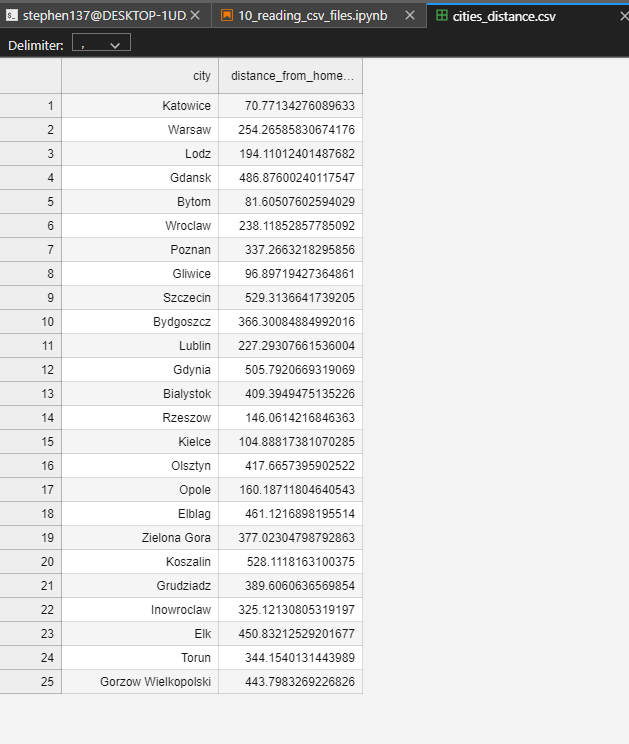